# Group 13 

# Data Lab : Crypto Currency

# Members:  Hao Chen, Zhaojing Chen, Banghua Qin

## Environment setup

In [1]:
# This magic command allows figures to be displayed in the notebook
%matplotlib inline 

# Uncomment this line if you want interactive matplotlib plot ()
# %matplotlib notebook 

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

## Packages and modules

In [2]:
# Import required packages
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from scipy.optimize import minimize
import sys

# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
# Module to do automatic exploratory data analysis
#from ydata_profiling import ProfileReport 

<IPython.core.display.Javascript object>

## Global and environment variables.

In [3]:
# figure formats

font = {'family':'DejaVu Sans',
        'size': 12}
plt.rc('font', **font) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html
#Note you can use python's kwargs dictionary facility to store dictionaries of default parameters. e.g., you can customize the font rc as follows:
#font = {'family' : 'monospace',
#        'weight' : 'bold',
#        'size'   : 'larger'}
#rc('font', **font)  # pass in the font dict as kwargs
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

# numpy number precision
np.set_printoptions(precision=4, suppress=True) # display options

DATA_FILE_1 = 'data/20-crypto-investing-mva.csv'        

DATA_FILE = 'data/21-crypto-investing-etf.csv'         
TOL = 1.0e-8                                    # Numerical tolerance for comparisons
SEED = 24                                       # Random number seed
SCALE = 12

# Data ingestion

Data dictionary - mva

| Position | Variable | Data Type | Description |
|:--------:|:---------|:---------|:---------|
| 0 | date | date | Calender date - end of month |
| 1 | stock | float | Value-weighted return to all NYSE, NASDAQ, and AMEX listed stocks. |
| 2 | bond | float | Vanguard Total Bond Market Index Fund |
| 3 | btc | float | Bitcoin - USD  |
| 4 | rf | float | 30days tresury bill yeild |

Data dictionary - etf

| Position | Variable | Data Type | Description |
|:--------:|:---------|:---------|:---------|
| 0 | date | date | Calender date - end of month |
| 1 | bito | float | ProShares Bitcoin Strategy ETF |
| 2 | xbtf | float | VanEck Bitcoin Strategy ETF |
| 3 | btc | float | Bitcoin - USD  |

# Question 1

The first step in the scientific method emphasizes making observations.The types of question clients may ask including:

**Basic concepts**: Customers first need to understand the fundamental concepts of cryptocurrencies. How are cryptocurrencies issued and managed? How is their value determined? How can one buy and hold this asset?

**Market Observation**: Keep an eye on the current state of the cryptocurrency market, predict trends, identify major players, and more. What factors influence the volatility of the cryptocurrency market? What are the future trends of cryptocurrencies?

**Risk Observation**: Investing in cryptocurrencies differs from investing in traditional stocks. Their value is determined by market supply and demand, so past price fluctuations do not necessarily indicate future fluctuations. Managers should monitor fluctuations in the cryptocurrency market to ensure that investors can withstand the volatility. 
Potential questions from clients might include: 
1. How do the risks and benefits of investing in cryptocurrencies compare to those of investing in the stock market?
2. Can cryptocurrencies provide earnings growth in a declining stock market or a bond market? 
3.  Will introducing cryptocurrencies into the traditional portfolio that contain bonds and stocks as risk assets bring some benefits? 
4. Is the volatility of cryptocurrency earnings influenced by economic conditions? Is there a significant correlation between cryptocurrencies and stocks or bonds?

**Environment Observation**: Due to the relatively short history of cryptocurrencies, the regulatory environment is still evolving, with rules and laws constantly changing. Developments in regulation can influence investors' decisions. Will the legal status of cryptocurrencies change? How might this impact their earnings? If the government tightens regulations on cryptocurrencies, will their liquidity be affected?

#liquidity流动性如何？investment horizon投资周期？

# Question 2 

Bill needs to construct hypotheses and conduct experiments according to scientific methods. For those questions that clients may raise about cryptocurrencies, Bill needs to first make judgments based on intuition and experience, and propose hypotheses. Based on potential customer questions, Bill's hypothesis may be:
1. As an investment target, cryptocurrencies have higher volatility and average returns than stocks.
2. Cryptocurrencies are less affected by the performance of the stock market and can be independent of market trends, with their own fluctuations. Therefore, they are not affected by market performance and can independently obtain returns (or incur losses when the stock market performs well) during market downturns.
3. Introducing cryptocurrencies into portfolio could increase the optimal Sharpe Ratio (tangent portfolio) and reduce the minimum Volatilities.
4. Cryptocurrency has a low correlation with stock market and bond market.


To prove or reject the above problem based assumptions, Bill needs to conduct experiments. Collect and analyze the yield situation of the stock and bond markets, using Bitcoin as a representative of cryptocurrency.
1. By calculating and visualizing statistical indicators, it is possible to analyze the differences in returns and variances between Bitcoin and traditional investment targets.
2. By using conditional indexes to select time periods with weak market performance and observing the returns of Bitcoin during the corresponding time periods, the impact of Bitcoin on market performance can be observed. At the same time, linear regression models can be run to determine whether market performance is a significant factor affecting Bitcoin returns based on statistical results.
3. By using the control variable method to optimize the investment portfolio with or without Bitcoin, and observing the impact of introducing Bitcoin on the optimization results, it is possible to determine whether Bitcoin can bring potential returns to the investment portfolio.
4. By calculating the correlation coefficient matrix, it is possible to intuitively determine the correlation between cryptocurrencies represented by Bitcoin and the stock and bond markets.

# Question 3 (Coding)

## Inspect raw data

In [4]:
!head -5 $DATA_FILE_1

date,stock,bond,btc,rf
2014-10-31,0.0252,0.00938558039380144,0.11742097403385054,0.0
2014-11-30,0.0255,0.006549415049906804,-0.1530338938256398,0.0
2014-12-31,-0.0006,-0.0017419664501973076,-0.3208345911554661,0.0
2015-01-31,-0.0311,0.025870096248430396,0.1692187863458139,0.0


In [5]:
!tail -5 $DATA_FILE_1

2022-02-28,-0.0229,-0.011272467785812923,0.05430112933051223,0.0
2022-03-31,0.0304,-0.029133293295735885,-0.1718056277838519,0.0001
2022-04-30,-0.0947,-0.037761173806980075,-0.157035240153918,0.0001
2022-05-31,-0.0037,0.005776431143414307,-0.37768830819165067,0.0003
2022-06-30,-0.0849,-0.01511669728249343,0.17954101663669286,0.0006


In [6]:
x  = !wc $DATA_FILE_1
print(x)
print(type(x)) #Ipython special list to interact with shell. https://ipython.readthedocs.io/en/stable/api/generated/IPython.utils.text.html
wc = x[0].split() #The split() method splits a string into a list. You can specify the separator, default separator is any whitespace.
print(wc) 
print(type(wc))
obs = int(wc[0])-1
print(f"Lines = {wc[0]}")
print(f"Words = {wc[1]}")
print(f"Bytes = {wc[2]}")

['      94      94    6639 data/20-crypto-investing-mva.csv']
<class 'IPython.utils.text.SList'>
['94', '94', '6639', 'data/20-crypto-investing-mva.csv']
<class 'list'>
Lines = 94
Words = 94
Bytes = 6639


## Read Data

In [7]:
# dates array
dates = np.genfromtxt(DATA_FILE_1,delimiter=',',usecols=[0],skip_header=1,dtype='datetime64[M]')

# returns array
rets_1 = np.genfromtxt(DATA_FILE_1,delimiter=',',usecols=np.arange(1,5),skip_header=1,dtype='float')
stock,bond,btc,rf = np.arange(rets_1.shape[1])
rets_labs_1 = ['stock','bond','btc','rf']

## Test read

In [8]:
assert dates[0] == np.datetime64("2014-10")
assert dates[-1] == np.datetime64("2022-06")

assert np.allclose(rets_1[0],np.array([0.0252,0.00938558039380144,0.11742097403385054,0.0]),0,TOL)
assert np.allclose(rets_1[-1],np.array([-0.0849,-0.01511669728249343,0.17954101663669286,0.0006]),0,TOL)

# Data wrangling and checks

## Dates array and missing data

In [9]:
assert np.isnan(dates).sum() == 0

### Sort order & contiguity

Date(t) - Date(t-1) = +1 for all t.

In [10]:
assert ((dates[1:] - dates[:-1]).astype(int) == 1).all()

### Missing values

In [11]:
np.isnan(rets_1).sum()

0

**Summary Statistics**

In [12]:
print(f"      {rets_labs_1}")
print(f"Mean: {rets_1.mean(axis=0)}")
print(f"SD:   {rets_1.std(axis=0)}")
print(f"Min:  {rets_1.min(axis=0)}")
print(f"Max:  {rets_1.max(axis=0)}")

      ['stock', 'bond', 'btc', 'rf']
Mean: [0.0081 0.0012 0.071  0.0006]
SD:   [0.0447 0.011  0.23   0.0007]
Min:  [-0.1352 -0.0378 -0.3777  0.    ]
Max:  [0.1365 0.028  0.6963 0.0021]


**annualize**

In [13]:
print(f"      {rets_labs_1}")
print(f"Mean: {rets_1.mean(axis=0)*12}")
print(f"SD:   {rets_1.std(axis=0)*np.sqrt(12)}")

      ['stock', 'bond', 'btc', 'rf']
Mean: [0.0977 0.0144 0.8525 0.0071]
SD:   [0.155  0.038  0.7968 0.0024]


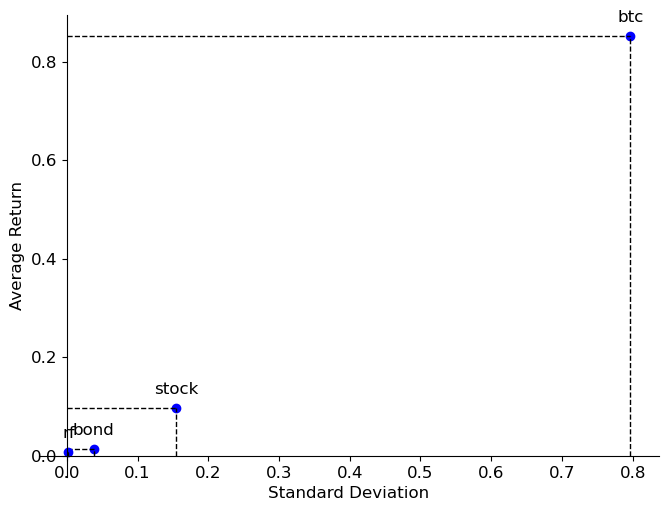

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
mu = 12*rets_1.mean(axis=0)
sigma = np.sqrt(12)*rets_1.std(axis=0)
for i,j in enumerate(rets_labs_1[:4]):
    ax.plot(sigma[i],mu[i],marker='o',color='b')
    ax.annotate(j, # this is the text
            (sigma[i],mu[i]), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,10), # distance from text to points (x,y)
            ha='center') # horizontal alignment can be left, right or center
    ax.vlines(sigma[i],0,mu[i],linestyle='--',color='k',linewidth=1)
    ax.hlines(mu[i],0,sigma[i],linestyle='--',color='k',linewidth=1)

ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Average Return')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.show()

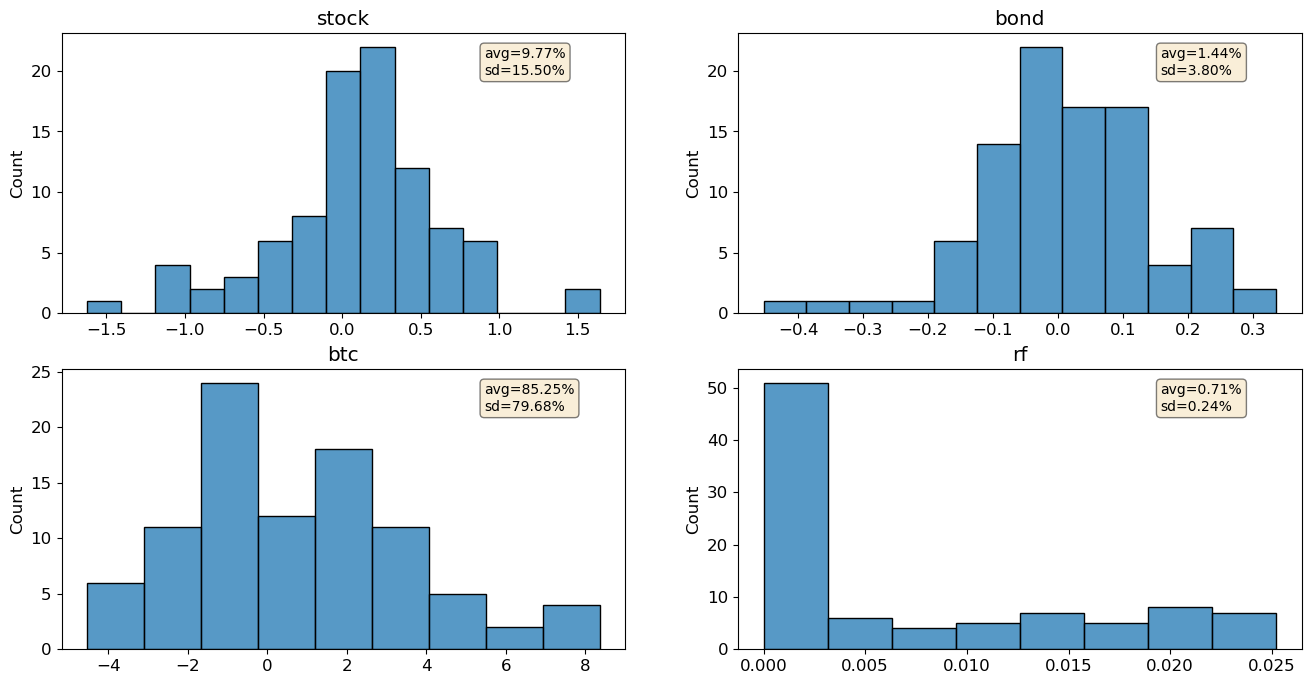

In [15]:
fig,ax=plt.subplots(2,2,figsize=(16,8))
ax=np.ravel(ax)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for i in np.arange(rets_1.shape[1]):
    ax[i] = sns.histplot(12*rets_1[:,i],ax=ax[i])
    ax[i].set_title(rets_labs_1[i])
    # place a text box in upper right in axes coords
    txtstr = f"avg={12*rets_1[:,i].mean():.2%}\nsd={np.sqrt(12)*rets_1[:,i].std():.2%}"
    ax[i].text(0.75, 0.95, txtstr, transform=ax[i].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    
plt.show()

# EDA

## Overlay histograms

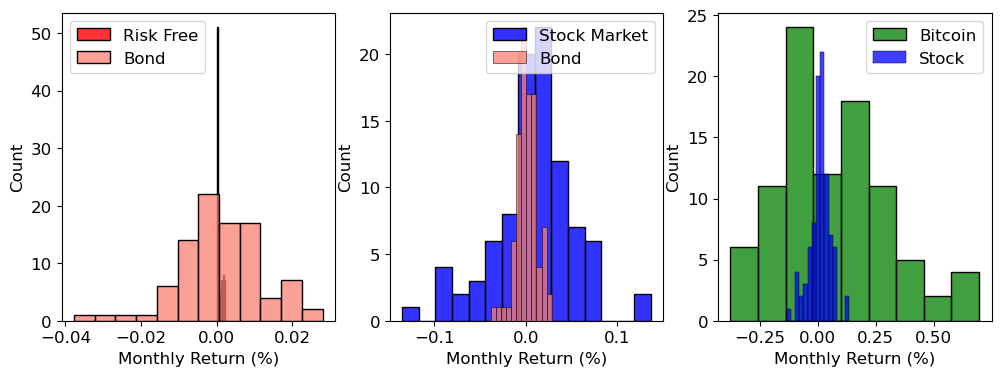

In [16]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))



ax1=sns.histplot(x=rets_1[:,rf], kde=False, color='r', alpha=0.8, label='Risk Free', ax=ax1)
ax1=sns.histplot(x=rets_1[:,bond], kde=False, color='salmon', label='Bond', ax=ax1)
ax1.set_xlabel("Monthly Return (%)")
ax1.legend()


ax2=sns.histplot(x=rets_1[:,stock], kde=False, color='blue', alpha=0.8, label='Stock Market', ax=ax2)
ax2=sns.histplot(x=rets_1[:,bond], kde=False, color='salmon', label='Bond', ax=ax2)
ax2.set_xlabel("Monthly Return (%)")
ax2.legend()


ax3=sns.histplot(x=rets_1[:,btc], kde=False, color='green', label='Bitcoin', ax=ax3)
ax3=sns.histplot(x=rets_1[:,stock], kde=False, color='blue', label='Stock', ax=ax3)
ax3.set_xlabel("Monthly Return (%)")
ax3.legend()

plt.show()

## Time series plots

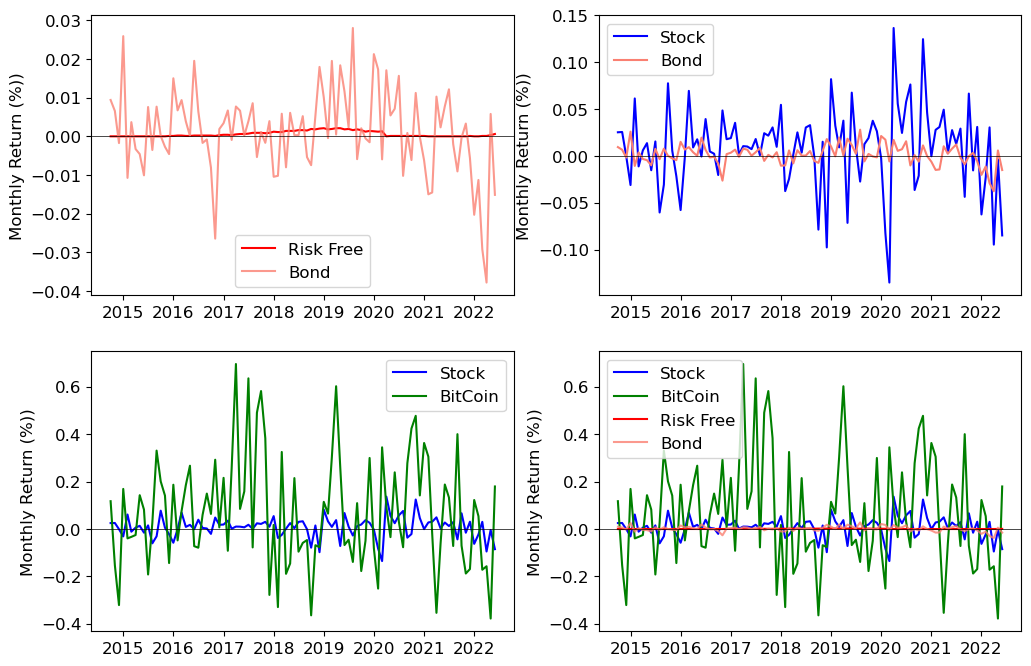

In [17]:
fig,ax=plt.subplots(2,2,figsize=(12,8))


sns.lineplot(x=dates, y=rets_1[:,rf], label="Risk Free", color='r', ax=ax[0][0])
sns.lineplot(x=dates, y=rets_1[:,bond], label="Bond", color='salmon', alpha=0.8, ax=ax[0][0])
ax[0][0].axhline(0,0,1,color='k',linewidth=.5)
ax[0][0].set_ylabel("Monthly Return (%))")


sns.lineplot(x=dates, y=rets_1[:,stock], label="Stock", color='b', ax=ax[0][1])
sns.lineplot(x=dates, y=rets_1[:,bond], label="Bond", color='salmon', ax=ax[0][1])
ax[0][1].axhline(0,0,1,color='k',linewidth=.5)
ax[0][1].set_ylabel("Monthly Return (%))")


sns.lineplot(x=dates, y=rets_1[:,stock], label="Stock", color='b', ax=ax[1][0])
sns.lineplot(x=dates, y=rets_1[:,btc], label="BitCoin", color='green', ax=ax[1][0])
ax[1][0].axhline(0,0,1,color='k',linewidth=.5)
ax[1][0].set_ylabel("Monthly Return (%))")


# all
sns.lineplot(x=dates, y=rets_1[:,stock], label="Stock", color='b', ax=ax[1][1])
sns.lineplot(x=dates, y=rets_1[:,btc], label="BitCoin", color='green', ax=ax[1][1])
sns.lineplot(x=dates, y=rets_1[:,rf], label="Risk Free", color='r', ax=ax[1][1])
sns.lineplot(x=dates, y=rets_1[:,bond], label="Bond", color='salmon', alpha=0.8, ax=ax[1][1])
ax[1][1].axhline(0,0,1,color='k',linewidth=.5)
ax[1][1].set_ylabel("Monthly Return (%))")

plt.show()

# Autocorrelation

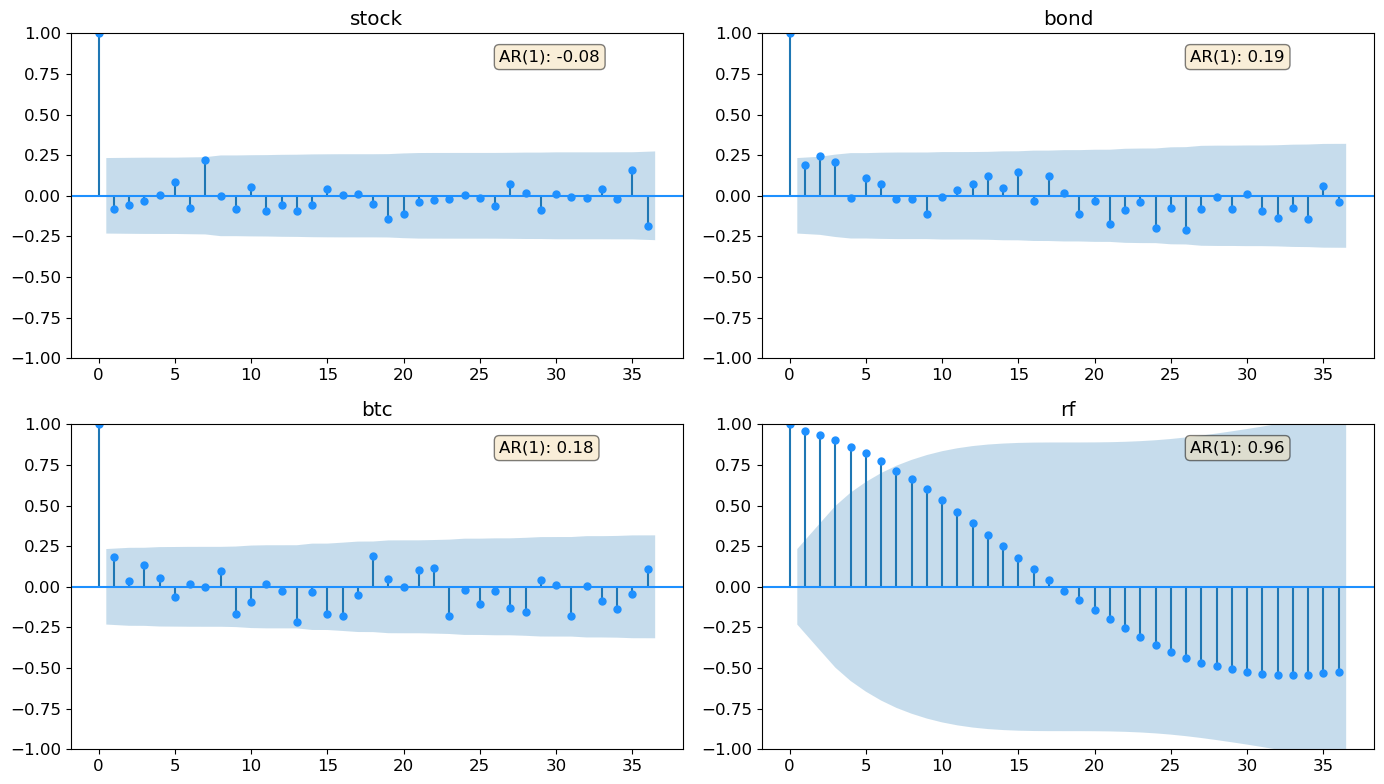

In [18]:
fig = plt.figure(figsize=(14,8))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Figure counter: 230 --> 2x3 grid
#subplot(2,3,1)=subplot(231) means 2x3 grid of plots, 1st subplot of the 6
# See here: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111
iplot = 220
for i in np.arange(4):
    iplot += 1                   # increment to tell maplotlib where to place the subplot
    ax = fig.add_subplot(iplot)  # add a suplot in position `iplot`
    sm.graphics.tsa.plot_acf(rets_1[:,i], lags=36, alpha=0.025, 
                         ax=ax, title=rets_labs_1[i], color='dodgerblue') #ACF function
   
    ar1 = np.corrcoef((rets_1[1:,i], rets_1[:-1,i]))[0,1] #autocorrelation of the series
    textstr = f"AR(1): {ar1:.2f}"
    ax.text(0.70, 0.95, textstr, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=props)
    
plt.tight_layout()
plt.show()

### Correlations

[[ 1.      0.1202  0.0574 -0.1286]
 [ 0.1202  1.     -0.0033  0.2199]
 [ 0.0574 -0.0033  1.     -0.0314]
 [-0.1286  0.2199 -0.0314  1.    ]]


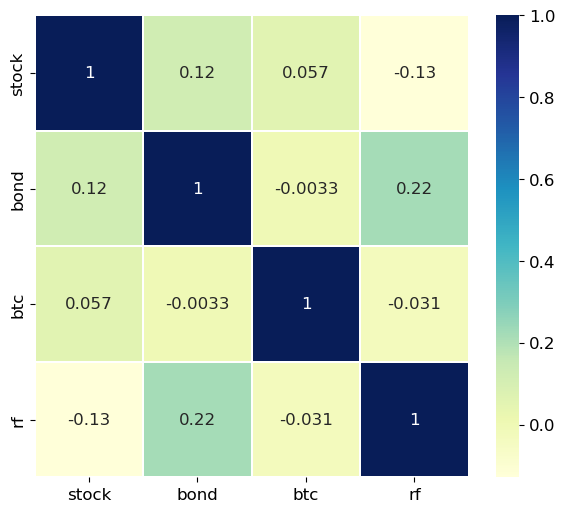

In [19]:
# get the correlation matrix for our return series
corrmat = np.corrcoef(rets_1,rowvar=False)
print(corrmat)
# Create a heatmap to visualize the correlation matrix (easeier to read)
f, ax = plt.subplots(figsize =(7, 6)) 
sns.heatmap(corrmat, annot=True, 
            ax = ax, cmap ="YlGnBu", 
            xticklabels=rets_labs_1,
            yticklabels=rets_labs_1,
            linewidths = 0.1)

plt.show()

BitCoin has :
1. Low correlation with stock market return and risk free yield.
2. Extremely low correlation with bond market return.

# Performance and risk metrics

## Sharpe ratio

In [20]:
# BitCoin
vdict = {
    'BitCoin': btc,
    'Stock': stock,
    'Bond' : bond,
}

print(vdict)
for k,v in vdict.items():
    mu = rets_1[:,v].mean()*12
    sd = rets_1[:,v].std()*np.sqrt(12)
    sr = ((rets_1[:,v] - rets_1[:,rf]).mean() / rets_1[:,v].std())*np.sqrt(12)
    print(f"{k} Annual Estimates:")
    print(f"  Average return: {mu:,.2%} (sd = {sd:,.2%})")
    print(f"  Sharpe ratio: {sr:,.2f}")

{'BitCoin': 2, 'Stock': 0, 'Bond': 1}
BitCoin Annual Estimates:
  Average return: 85.25% (sd = 79.68%)
  Sharpe ratio: 1.06
Stock Annual Estimates:
  Average return: 9.77% (sd = 15.50%)
  Sharpe ratio: 0.58
Bond Annual Estimates:
  Average return: 1.44% (sd = 3.80%)
  Sharpe ratio: 0.19


In [21]:
# Estimate AR 1 coef 

ret_sf = np.corrcoef(rets_1[1:,btc], rets_1[:-1,btc])[1,0]
rm_sf = np.corrcoef(rets_1[1:,stock], rets_1[:-1,stock])[1,0]
print(f"BitCoin AR(1): {ret_sf:.2f}, Stock Market AR(1): {rm_sf:.2f}")

BitCoin AR(1): 0.18, Stock Market AR(1): -0.08


## Porfolio performance

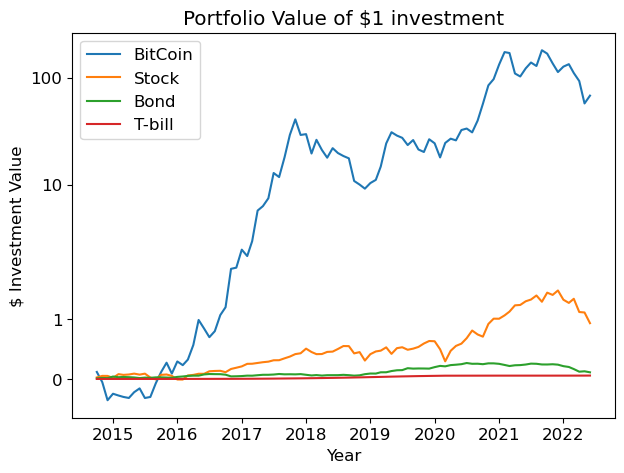

In [22]:
# Compute cumulative net return 
d = (1+rets_1[:,[btc,stock,bond,rf]]).cumprod(axis=0) - 1

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.set_yscale('symlog') 
ax.plot(dates,d[:,0],label='BitCoin')
ax.plot(dates,d[:,1],label='Stock')
ax.plot(dates,d[:,2],label='Bond')
ax.plot(dates,d[:,3],label='T-bill')
ax.set_title("Portfolio Value of $1 investment")
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ','))
)  # format the y-axis tick labels
ax.set_ylabel("$ Investment Value")
ax.set_xlabel("Year")

ax.legend()
ax.grid(False)
plt.show()

## Lower partial standard deviation of risk assets

In [23]:
vlist = [btc,stock,bond]
for v,n in zip(vlist,['BitCoin','Stock','Bond']):
    m = rets_1[:,v] < rets_1[:,rf]
    print(f"{n}: LPSD = {rets_1[m,v].std():.4f}, # < rf = {m.sum()} , lower part percentage = {m.sum()/len(rets_1[:,rf]):.2%}")

BitCoin: LPSD = 0.1009, # < rf = 41 , lower part percentage = 44.09%
Stock: LPSD = 0.0348, # < rf = 32 , lower part percentage = 34.41%
Bond: LPSD = 0.0081, # < rf = 45 , lower part percentage = 48.39%


## Probability of loss

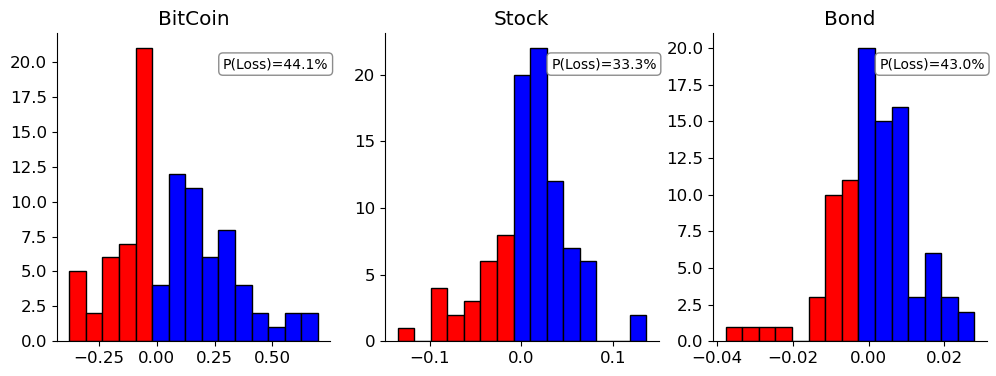

In [24]:
# N=freq, bins=left edges
bins = 15
fig,axes=plt.subplots(1,3,figsize=(12,4))
axes=np.ravel(axes)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

for ax,col,n in zip(axes,[btc,stock,bond],['BitCoin','Stock','Bond']):
    N, ledges, patches = ax.hist(rets_1[:,col], bins)

    last_neg = np.argwhere(ledges<0).max() - 1
    for i in np.arange(bins):
        if i<=last_neg:
            patches[i].set_facecolor('r')
        else:
            patches[i].set_facecolor('b')
        patches[i].set_edgecolor('k')

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ploss = (rets_1[:,col] < 0).sum() / rets_1.shape[0]
    ax.set_title(f"{n}")
    ax.text(.8,.9, f"P(Loss)={ploss:.1%}", 
               ha="center", va="center", 
               transform=ax.transAxes,size=10,bbox=bbox_props)

## %5 VaR

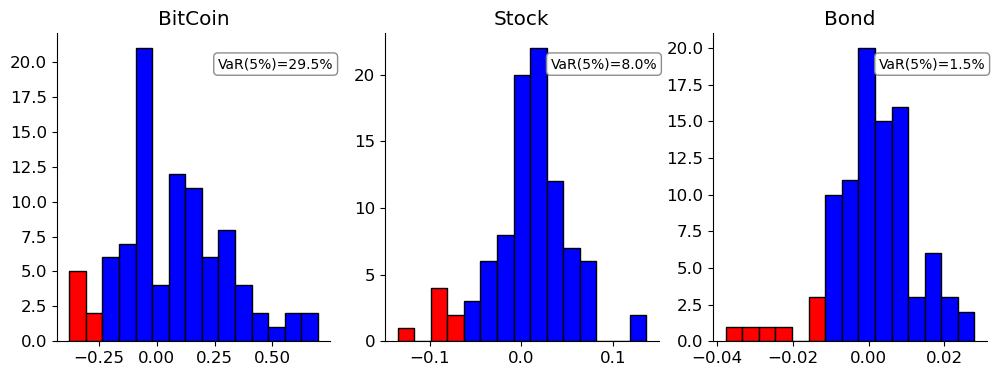

In [25]:
# N=freq, bins=left edges
bins = 15
fig,axes=plt.subplots(1,3,figsize=(12,4))
axes=np.ravel(axes)

for ax,col,n in zip(axes,[btc,stock,bond],['BitCoin','Stock','Bond']):
    N, ledges, patches = ax.hist(rets_1[:,col], bins)

    ## Define VAR at 5% for each return series
    var = np.quantile(rets_1[:,col],.05)
    last_neg = np.argwhere(ledges<var).max()
    for i in np.arange(bins):
        if i<=last_neg:
            patches[i].set_facecolor('r')
        else:
            patches[i].set_facecolor('b')
        patches[i].set_edgecolor('k')

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ploss = (rets_1[:,col] < 0).sum() / rets_1.shape[0]
    ax.set_title(f"{n}")
    ax.text(.8,.9, f"VaR(5%)={var*-1:.1%}", 
               ha="center", va="center", 
               transform=ax.transAxes,size=10,bbox=bbox_props)

## Expected Shortfall (Return)

In [26]:
vlist = [btc,stock,bond]
for v,n in zip(vlist,['BitCoin','Stock','Bond']):
    l = rets_1[:,v] < 0
    g = rets_1[:,v] >= 0
    print(f"{n}: E(r|r<0) = {rets_1[l,v].mean():.2%}; E(r|r>0) = {rets_1[g,v].mean():.2%}")

BitCoin: E(r|r<0) = -13.38%; E(r|r>0) = 23.26%
Stock: E(r|r<0) = -3.86%; E(r|r>0) = 3.15%
Bond: E(r|r<0) = -0.81%; E(r|r>0) = 0.82%


## Expected loss conditional on being in the 5-percentile

In [27]:
vlist = [btc,stock,bond]
for v,n in zip(vlist,['BitCoin','Stock','Bond']):
    var = np.quantile(rets_1[:,v],.05)
    m = rets_1[:,v] < var
    print(f"{n} expected shortfall at 5%: {rets_1[m,v].mean():.2%}")

BitCoin expected shortfall at 5%: -34.91%
Stock expected shortfall at 5%: -9.90%
Bond expected shortfall at 5%: -2.57%


## Crises response

In [28]:
# Variable names describe what code does.
worst_market_return = rets_1[:,stock].min()
idx_worst_market_return = np.argmin(rets_1[:,stock])
date_of_worst_market_return = dates[idx_worst_market_return]
bitcoin_return_on_date_of_worst_market_return = rets_1[idx_worst_market_return,btc]

print(f"Worst market return = {worst_market_return:.2%} on {date_of_worst_market_return}")
print(f"Bitcoin return on {date_of_worst_market_return} = {bitcoin_return_on_date_of_worst_market_return:.2%}")

Worst market return = -13.52% on 2020-03
Bitcoin return on 2020-03 = 34.48%


#### **Not that relevant**

#### **Which is consistent with the low correlation coefficient between Btc and Stock Market**

## The worst five days of Bitcoin

In [29]:
k = 5                                     # how many bad returns do we want to look at?
idx = np.argpartition(rets_1[:,btc], k)[:k]  # indices of lowest k market returns

# print out the k lowest market returns and corresponding dates
print(f"Dates {k}-lowest Bitcoin returns:\n{dates[idx]}")
print(f"{k}-lowest Bitcoin returns:\n{rets_1[idx,btc]}")

Dates 5-lowest Bitcoin returns:
['2021-04' '2018-02' '2022-05' '2018-10' '2014-12']
5-lowest Bitcoin returns:
[-0.3535 -0.3293 -0.3777 -0.3641 -0.3208]


# OLS

In [30]:
y = rets_1[:,btc] - rets_1[:,rf] 

x = rets_1[:,stock] - rets_1[:,rf] 

# add a constant
xmat = sm.add_constant(x)
print(y.shape)

res = sm.OLS(y,xmat).fit()
print(res.summary(xname=['const','Rm-Rf']))

(93,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3094
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.579
Time:                        23:19:48   Log-Likelihood:                 4.8640
No. Observations:                  93   AIC:                            -5.728
Df Residuals:                      91   BIC:                           -0.6629
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0682      0.024      2.793   

## According to the result, we know that coefficient of Rm-Rf is Not Significant

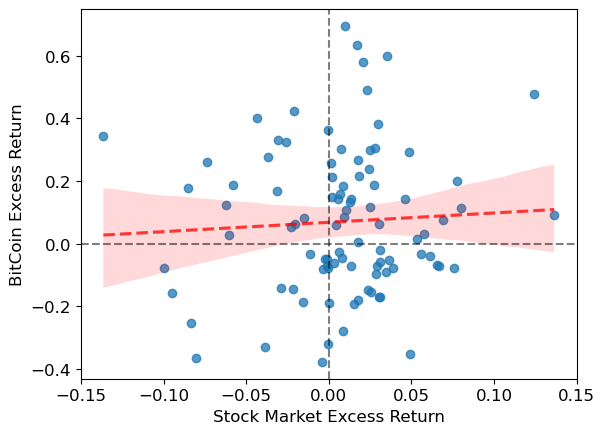

In [31]:
fig,ax=plt.subplots(1,1)
sns.regplot(x=x,y=y,ax=ax,
            scatter_kws={'alpha':.75},
            line_kws={'color':'r','linestyle':'--','alpha':0.75})
ax.set_ylabel("BitCoin Excess Return")
ax.set_xlabel("Stock Market Excess Return")
ax.axvline(0,0,1,color='k',linestyle='--',alpha=0.5)
ax.axhline(0,0,1,color='k',linestyle='--',alpha=0.5)

plt.show()

# Advanced analysis
### : Mean-variance analysis with and without cryptocurrency

## 1. Mean-variance analysis with cryptocurrency
- Asset 1 = Stock
- Asset 2 = Bond
- Asset 3 = BitCoin

In [32]:
rets_1

array([[ 0.0252,  0.0094,  0.1174,  0.    ],
       [ 0.0255,  0.0065, -0.153 ,  0.    ],
       [-0.0006, -0.0017, -0.3208,  0.    ],
       [-0.0311,  0.0259,  0.1692,  0.    ],
       [ 0.0613, -0.0107, -0.0395,  0.    ],
       [-0.0112,  0.0037, -0.0331,  0.    ],
       [ 0.0059, -0.0033, -0.0252,  0.    ],
       [ 0.0136, -0.0046,  0.1428,  0.    ],
       [-0.0153, -0.0101,  0.082 ,  0.    ],
       [ 0.0154,  0.0076, -0.1918,  0.    ],
       [-0.0604, -0.0035,  0.0261,  0.    ],
       [-0.0307,  0.0077,  0.3309,  0.    ],
       [ 0.0775,  0.0001,  0.201 ,  0.    ],
       [ 0.0056, -0.0027,  0.1411,  0.    ],
       [-0.0218, -0.0046, -0.1435,  0.0001],
       [-0.0578,  0.015 ,  0.1869,  0.0001],
       [-0.0009,  0.0067, -0.0479,  0.0002],
       [ 0.0694,  0.0094,  0.0758,  0.0002],
       [ 0.009 ,  0.0039,  0.1853,  0.0001],
       [ 0.0177,  0.0001,  0.2671,  0.0001],
       [-0.0007,  0.0195, -0.0723,  0.0002],
       [ 0.0393,  0.0064, -0.0788,  0.0002],
       [ 0

In [33]:
means = rets_1.mean(0)
vols  = rets_1.std(0,ddof=1) 
mins  = rets_1.min(0)
maxs  = rets_1.max(0)

In [34]:
# mean vector
rets_1.mean(0)
print(f"      {rets_labs_1}")
print(f"Avg:  {means}")
print(f"SD:   {vols}")
print(f"Min:  {mins}")
print(f"Max:  {maxs}")

      ['stock', 'bond', 'btc', 'rf']
Avg:  [0.0081 0.0012 0.071  0.0006]
SD:   [0.045  0.011  0.2313 0.0007]
Min:  [-0.1352 -0.0378 -0.3777  0.    ]
Max:  [0.1365 0.028  0.6963 0.0021]


In [35]:
print(f"      {rets_labs_1}")
print(f"Avg:  {means*SCALE}")
print(f"SD:   {vols*np.sqrt(SCALE)}")

      ['stock', 'bond', 'btc', 'rf']
Avg:  [0.0977 0.0144 0.8525 0.0071]
SD:   [0.1558 0.0382 0.8011 0.0024]


In [36]:
vols[:3]

array([0.045 , 0.011 , 0.2313])

In [37]:
# means
mu_1, mu_2, mu_3, mu_rf = means*SCALE   
# volatilities
s_1, s_2 ,s_3         = vols[:3]*np.sqrt(SCALE)
# correlation
corr              = np.corrcoef(rets_1[:,[stock,bond,btc]],rowvar=False) 

print(means*SCALE)
print(mu_1, mu_2, mu_3, mu_rf)
print(corr)

[0.0977 0.0144 0.8525 0.0071]
0.09765161290322585 0.014357574283805453 0.852450855193953 0.007135483870967747
[[ 1.      0.1202  0.0574]
 [ 0.1202  1.     -0.0033]
 [ 0.0574 -0.0033  1.    ]]


In [38]:
# Portfolio variance
def f_pvar(w,sigma): 
    return w.T@sigma@w 

In [39]:
sigma_mat  = np.cov(rets_1[:,[stock,bond,btc]], rowvar=False)*SCALE
print(sigma_mat)

assert np.isclose(np.sqrt(sigma_mat[0,0]), s_1, TOL)
assert np.allclose(np.sqrt(sigma_mat[1,1]), s_2, TOL)

[[ 0.0243  0.0007  0.0072]
 [ 0.0007  0.0015 -0.0001]
 [ 0.0072 -0.0001  0.6417]]


## Minimum variance portfolio (with BitCoin)

In [40]:
#Scipy minimize function 
#See section on "Constraints" https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 


# constraint

# fulfilled if > 0 (positive weights)
constraint_1 = dict(type='ineq', fun=lambda x: x)
# fulfilled if == 0 (weights sum to 1)
constraint_2 = dict(type='eq', fun=lambda x: x.T@np.ones((x.shape)) - 1) 
print(constraint_1)




# starting value = equal weight 
nassets = 3
x0  = np.ones(nassets)/nassets 
print(x0) 

res = minimize(fun=f_pvar, 
               x0=x0, #x0 ndarray, shape (n,) Initial guess. Array of real elements of size (n,), where n is the number of independent variables.
               args=(sigma_mat), 
               constraints=[constraint_2],
               options=dict(ftol=1e-8))  # default 1e-6



print(res)
print("              Stock   Bond  Bitcoin  Portfolio Vol")
print(f"Numerical  : {res.x} ({np.sqrt(res.fun):.4f})")

{'type': 'ineq', 'fun': <function <lambda> at 0x168358430>}
[0.3333 0.3333 0.3333]
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0014350360989266696
       x: [ 2.988e-02  9.681e-01  2.052e-03]
     nit: 9
     jac: [ 2.867e-03  2.870e-03  2.868e-03]
    nfev: 36
    njev: 9
              Stock   Bond  Bitcoin  Portfolio Vol
Numerical  : [0.0299 0.9681 0.0021] (0.0379)


## Tangency portfolio (Maximize Sharpe Ratio With Bitcoin)

In [41]:
# Share ratio calculation
def f_sharpe(w,mu,sigma,rf):
    # going to minimize the function so negate  (e.g., maximize sharpe ratio!)
    return -(w.T@mu - rf) / np.sqrt(w.T@sigma@w) 



In [42]:
mu_vec = rets_1[:,[stock,bond,btc]].mean(axis=0).reshape(-1,1)*SCALE
sigma_mat  = np.cov(rets_1[:,[stock,bond,btc]], rowvar=False)*SCALE

assert np.isclose(mu_vec[0,0] , mu_1, TOL)
assert mu_vec[1,0]==mu_2
assert np.isclose(np.sqrt(sigma_mat[0,0]) , s_1,TOL)
assert np.isclose(np.sqrt(sigma_mat[1,1]), s_2)

In [43]:
constraint_1 = dict(type='ineq', fun=lambda x: x)                       # fulfilled if > 0
constraint_2 = dict(type='eq', fun=lambda x: x.T@np.ones((x.shape)) - 1)  # fulfilled if == 0

# starting value = equal weight
nassets = 3
x0  = np.ones(nassets)/nassets #initial guess for the weights
res_tan = minimize(fun=f_sharpe, 
               x0=x0, 
               args=(mu_vec,sigma_mat,mu_rf), 
               constraints=[constraint_2],
               options=dict(ftol=1e-8))  # default 1e-6
print(res_tan)
#print(res.shape)
print("              Stock   Bond  BitCoin Max Sharpe Ratio")
print(f"Numerical  : {res_tan.x} ({-res_tan.fun:.4f})")

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1840842168523142
       x: [ 4.075e-01  4.317e-01  1.608e-01]
     nit: 10
     jac: [-4.796e-02 -4.802e-02 -4.823e-02]
    nfev: 41
    njev: 10
              Stock   Bond  BitCoin Max Sharpe Ratio
Numerical  : [0.4075 0.4317 0.1608] (1.1841)


## Visualization(With  Bitcoin)

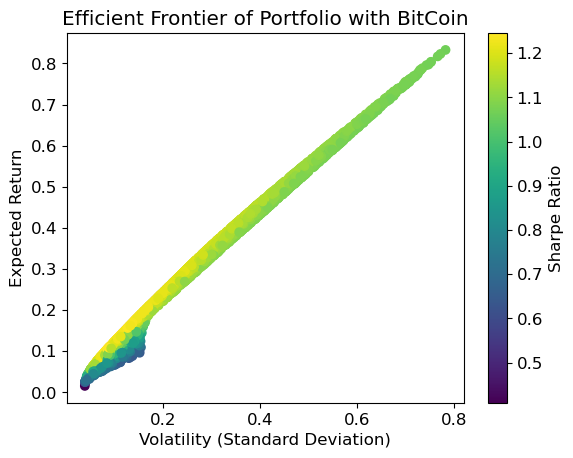

In [44]:
returns = np.array([mu_1, mu_2, mu_3])  
std_devs = np.array([s_1, s_2, s_3])
correlation_matrix = corr


cov_matrix = np.outer(std_devs, std_devs) * correlation_matrix


n_portfolios = 10000
weights_record = []
return_arr = []
volatility_arr = []

for _ in range(n_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)  # 确保权重之和为1
    weights_record.append(weights)
    returns_portfolio = np.dot(weights, returns)
    volatility_portfolio = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    return_arr.append(returns_portfolio)
    volatility_arr.append(volatility_portfolio)

return_arr = np.array(return_arr)
volatility_arr = np.array(volatility_arr)


plt.scatter(volatility_arr, return_arr, c=return_arr/volatility_arr, marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of Portfolio with BitCoin')
plt.show()


## 2. Mean-variance analysis without cryptocurrency
- Asset 1 = Stock
- Asset 2 = Bond

In [45]:
rets_nobit = rets_1[:,[0,1,3]]
np.shape(rets_nobit)

(93, 3)

In [46]:
rets_labs_1

['stock', 'bond', 'btc', 'rf']

In [47]:

labs_nobit = rets_labs_1[:]


index_to_remove = 2


labs_nobit.pop(index_to_remove)

print("Original list:", rets_labs_1)  
print("Modified list:", labs_nobit)  


Original list: ['stock', 'bond', 'btc', 'rf']
Modified list: ['stock', 'bond', 'rf']


In [48]:
means_nobit = rets_nobit.mean(0)
vols_nobit  = rets_nobit.std(0,ddof=1) 
mins_nobit  = rets_nobit.min(0)
maxs_nobit  = rets_nobit.max(0)

In [49]:
# mean vector
rets_nobit.mean(0)
print(f"      {labs_nobit}")
print(f"Avg:  {means_nobit}")
print(f"SD:   {vols_nobit}")
print(f"Min:  {mins_nobit}")
print(f"Max:  {maxs_nobit}")

      ['stock', 'bond', 'rf']
Avg:  [0.0081 0.0012 0.0006]
SD:   [0.045  0.011  0.0007]
Min:  [-0.1352 -0.0378  0.    ]
Max:  [0.1365 0.028  0.0021]


In [50]:
print(f"      {labs_nobit}")
print(f"Avg:  {means_nobit*SCALE}")
print(f"SD:   {vols_nobit*np.sqrt(SCALE)}")

      ['stock', 'bond', 'rf']
Avg:  [0.0977 0.0144 0.0071]
SD:   [0.1558 0.0382 0.0024]


In [51]:
# means
mu_1, mu_2, mu_rf = means_nobit*SCALE   
# volatilities
s_1, s_2         = vols_nobit[:2]*np.sqrt(SCALE) 
# correlation
corr              = np.corrcoef(rets_1[:,[stock,bond]],rowvar=False)[1][0] 

print(means*SCALE)
print(mu_1, mu_2, mu_rf)
print(corr)

[0.0977 0.0144 0.8525 0.0071]
0.0976516129032258 0.014357574283805453 0.007135483870967743
0.12024848622703616


In [52]:
# Portfolio variance
def f_pvar(w,sigma): 
    return w.T@sigma@w 

In [53]:
sigma_mat_n1  = np.cov(rets_1[:,[stock,bond]], rowvar=False)*SCALE
print(sigma_mat_n1)

assert np.isclose(np.sqrt(sigma_mat_n1[0,0]), s_1, TOL)
assert np.allclose(np.sqrt(sigma_mat_n1[1,1]), s_2, TOL)

[[0.0243 0.0007]
 [0.0007 0.0015]]


## Minimum variance portfolio (without BitCoin)

In [54]:
#Scipy minimize function 
#See section on "Constraints" https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 


# constraint

# fulfilled if > 0 (positive weights)
constraint_1 = dict(type='ineq', fun=lambda x: x)
# fulfilled if == 0 (weights sum to 1)
constraint_2 = dict(type='eq', fun=lambda x: x.T@np.ones((x.shape)) - 1) 

print(constraint_1)




# starting value = equal weight 
nassets = 2
x0  = np.ones(nassets)/nassets 
print(x0) 

res_n1 = minimize(fun=f_pvar, 
               x0=x0, #x0 ndarray, shape (n,) Initial guess. Array of real elements of size (n,), where n is the number of independent variables.
               args=(sigma_mat_n1), 
               constraints=[constraint_2],
               options=dict(ftol=1e-8))  # default 1e-6



print(res)
print("              Stock   Bond    Portfolio Vol")
print(f"Numerical  : {res_n1.x} ({np.sqrt(res_n1.fun):.4f})")

{'type': 'ineq', 'fun': <function <lambda> at 0x16853c3a0>}
[0.5 0.5]
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0014350360989266696
       x: [ 2.988e-02  9.681e-01  2.052e-03]
     nit: 9
     jac: [ 2.867e-03  2.870e-03  2.868e-03]
    nfev: 36
    njev: 9
              Stock   Bond    Portfolio Vol
Numerical  : [0.0306 0.9694] (0.0379)


## Tangency portfolio (without Bitcoin)

In [55]:
# Share ratio calculation
def f_sharpe(w,mu,sigma,rf):
    # going to minimize the function so negate  (e.g., maximize sharpe ratio!)
    return -(w.T@mu - rf) / np.sqrt(w.T@sigma@w) 



In [56]:
mu_vec_nobit = rets_nobit[:,[stock,bond]].mean(axis=0).reshape(-1,1)*SCALE
sigma_mat_n2  = np.cov(rets_1[:,[stock,bond]], rowvar=False)*SCALE

assert np.isclose(mu_vec[0,0] , mu_1, TOL)
assert mu_vec[1,0]==mu_2
assert np.isclose(np.sqrt(sigma_mat[0,0]) , s_1,TOL)
assert np.isclose(np.sqrt(sigma_mat[1,1]), s_2)

In [57]:
constraint_1 = dict(type='ineq', fun=lambda x: x)                       # fulfilled if > 0
constraint_2 = dict(type='eq', fun=lambda x: x.T@np.ones((x.shape)) - 1)  # fulfilled if == 0

# starting value = equal weight
nassets = 2
x0  = np.ones(nassets)/nassets #initial guess for the weights
res_n2 = minimize(fun=f_sharpe, 
               x0=x0, 
               args=(mu_vec_nobit,sigma_mat_n2,mu_rf), 
               constraints=[constraint_2],
               options=dict(ftol=1e-8))  # default 1e-6
print(res_n2)
#print(res.shape)
print("              Stock   Bond  Max Sharpe Ratio")
print(f"Numerical  : {res_n2.x} ({-res_n2.fun:.4f})")

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5930965138751716
       x: [ 5.346e-01  4.654e-01]
     nit: 5
     jac: [-8.178e-02 -8.177e-02]
    nfev: 15
    njev: 5
              Stock   Bond  Max Sharpe Ratio
Numerical  : [0.5346 0.4654] (0.5931)


In [58]:
pvol_tang = (
    np.sqrt(
        (res_n2.x[0]*s_1)**2
        + (res_n2.x[1]*s_2)**2
        + 2*res_n2.x[0]*res_n2.x[1]*s_1*s_2*corr
    )
)

In [59]:
w_1 = np.linspace(-0.5,1.5)         # stock weights. Number of samples to generate is 50 by default (like here).
print(w_1)
w_2 = 1 - w_1                       # bond weights ## THEY NEED TO SUM UP TO 1

pret_mvf = w_1*mu_1 + w_2*mu_2      # portfolio expected return

# portfolio volatility
pvol_mvf = (
    np.sqrt(
        (w_1*s_1)**2
        + (w_2*s_2)**2
        + 2*w_1*w_2*s_1*s_2*corr      
    )
)

pret_tang = res_n2.x[0] * mu_1 + res_n2.x[1] * mu_2 # portfolio return tangent 与frontier相切的期望投资组合回报

[-0.5    -0.4592 -0.4184 -0.3776 -0.3367 -0.2959 -0.2551 -0.2143 -0.1735
 -0.1327 -0.0918 -0.051  -0.0102  0.0306  0.0714  0.1122  0.1531  0.1939
  0.2347  0.2755  0.3163  0.3571  0.398   0.4388  0.4796  0.5204  0.5612
  0.602   0.6429  0.6837  0.7245  0.7653  0.8061  0.8469  0.8878  0.9286
  0.9694  1.0102  1.051   1.0918  1.1327  1.1735  1.2143  1.2551  1.2959
  1.3367  1.3776  1.4184  1.4592  1.5   ]


In [60]:
alpha = np.linspace(0,2) 
pret_eff = alpha * (res_n2.x[0]*mu_1 + res_n2.x[1]*mu_2) + (1 - alpha) * mu_rf
pvol_eff = alpha * pvol_tang

In [61]:
pret_mvp = res.x[0] * mu_1 + res.x[1] * mu_2

pvol_mvp = (
    np.sqrt(
        (res.x[0]*s_1)**2
        + (res.x[1]*s_2)**2
        + 2 * res.x[0] * res.x[1] * s_1 * s_2 * corr 
    )
)

## Visualization(Without - Bitcoin)

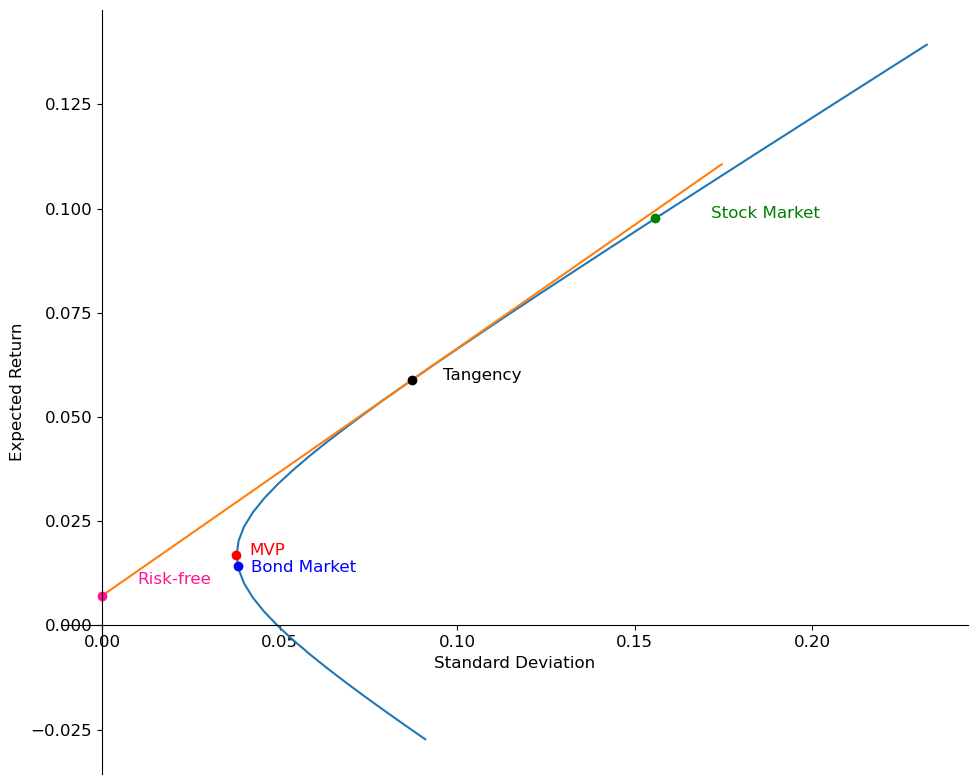

In [62]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.set_ylabel("Expected Return")
ax.set_xlabel("Standard Deviation")

ax.plot(pvol_mvf, pret_mvf)  # mean-var frontier 
ax.plot(pvol_eff,pret_eff)   # efficient frontier 
# Plot individual points
ax.plot(pvol_tang, pret_tang, marker="o", color='k')        # Tangency portfolio
ax.text(pvol_tang*1.1, pret_tang, 'Tangency', color='k')
ax.plot(pvol_mvp, pret_mvp, marker="o", color='r')          # MVP portfolio
ax.text(pvol_mvp*1.1, pret_mvp, 'MVP', color='r')
ax.plot(s_1, mu_1, marker="o", color='g')           # stock portfolio
ax.text(s_1*1.1, mu_1, 'Stock Market', color='g')
ax.plot(s_2, mu_2, marker="o", color='b')             # bond portfoliop
ax.text(s_2*1.1, mu_2*.9, 'Bond Market', color='b')
ax.plot(0, mu_rf, marker="o", color='deeppink')             # risk-free return
ax.text(0+.01, 0+.01, 'Risk-free', color='deeppink')

# format spines
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.tight_layout()
plt.show()
#橙色线的斜率是sharp ratio

# Comparison

In [63]:
print(f'When including Bitcoin as a investment, the Max Sharpe Ratio is {-res_tan.fun:.4f}')
print(f'When not including Bitcoin as a investment, the Max Sharpe Ratio is {-res_n2.fun:.4f}')

When including Bitcoin as a investment, the Max Sharpe Ratio is 1.1841
When not including Bitcoin as a investment, the Max Sharpe Ratio is 0.5931


# Inference and Conclusion of Question 3

By executing a complete data science workflow, based on our dataset, we have obtained valuable information about cryptocurrency investments represented by Bitcoin. These information provide us with sufficient support to recommend cryptocurrency as a potential investment option to customers.

1. Firstly, by presenting summary statistics and visualizing them, we understand that the volatility and maximum monthly drawdown of Bitcoin prices are much higher than those of stocks and bonds, but accompanied by high risks, there are also considerable returns, with the average and maximum monthly returns being the highest. This means that Bitcoin, as a highly risky and highly profitable asset, may be suitable for some extremely aggressive investors.

2. Secondly, as an investment target, Bitcoin has extremely low correlation with the stock and bond markets, and is therefore not affected by the performance of the two markets, and can present a nearly independent market trend. Therefore, in a sense, cryptocurrencies represented by Bitcoin can serve as financial tools for diversified investments, providing investors with more opportunities to diversify risk and avoiding the risks associated with investing in asset classes with strong correlation.

3. Finally, based on the given dataset, through Mean Variance Analysis and comparing the optimization results of investment portfolios with and without Bitcoin, although Bitcoin as an investment alternative does not significantly affect the optimization of minimizing variance (because Bitcoin itself has extremely high volatility), we found that adding Bitcoin as an investment option can significantly improve the optimal Sharpe ratio of the investment portfolio.

4. In summary, cryptocurrency represented by Bitcoin is a high-risk and high return asset, and its low correlation with the market can effectively diversify investment. Using Bitcoin as an investment option can also improve the optimal Sharpe ratio of the investment portfolio. Based on these characteristics, we can recommend cryptocurrency to customers as a potential investment.

# Question 4 (Coding)

In [64]:
DATA_FILE = 'data/21-crypto-investing-etf.csv' 
# dates array
dates = np.genfromtxt(DATA_FILE,delimiter=',',usecols=[0],skip_header=1,dtype='datetime64[D]')
# returns array
rets = np.genfromtxt(DATA_FILE,delimiter=',',usecols=np.arange(1,4),skip_header=1,dtype='float')
bito,xbtf,btc = np.arange(rets.shape[1])
rets_labs = ['bito','xbtf','btc']

### Statistic Analysis

In [65]:
print(f'      {rets_labs}')
print(f"Mean: {rets.mean(axis=0)}")
print(f"SD:   {rets.std(axis=0)}")
print(f"Min:  {rets.min(axis=0)}")
print(f"Max:  {rets.max(axis=0)}")

      ['bito', 'xbtf', 'btc']
Mean: [-0.0045 -0.0045 -0.0047]
SD:   [0.0431 0.0431 0.0385]
Min:  [-0.2022 -0.1986 -0.1597]
Max:  [0.1191 0.1194 0.1454]


##### Monthly Return

In [66]:
print(f"      {rets_labs}")
print(f"Mean: {rets.mean(axis=0)*22}")
print(f"SD:   {rets.std(axis=0)*np.sqrt(22)}")

      ['bito', 'xbtf', 'btc']
Mean: [-0.1001 -0.0993 -0.1026]
SD:   [0.2023 0.202  0.1805]


### Histogram

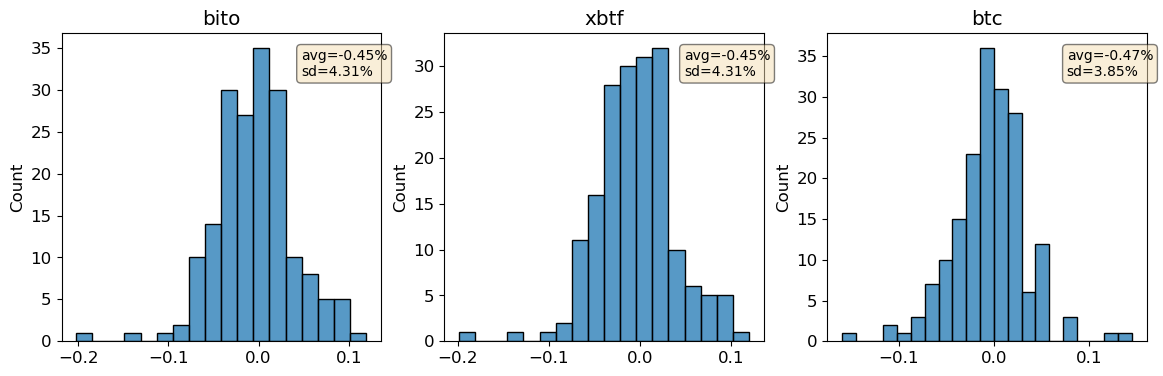

In [67]:
fig,ax=plt.subplots(1,3,figsize=(14,4))
ax=np.ravel(ax)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for i in np.arange(rets.shape[1]):
    ax[i] = sns.histplot(rets[:,i],ax=ax[i])
    ax[i].set_title(rets_labs[i])
    # place a text box in upper right in axes coords
    txtstr = f"avg={rets[:,i].mean():.2%}\nsd={rets[:,i].std():.2%}"
    ax[i].text(0.75, 0.95, txtstr, transform=ax[i].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
plt.show()

### Overlay histograms

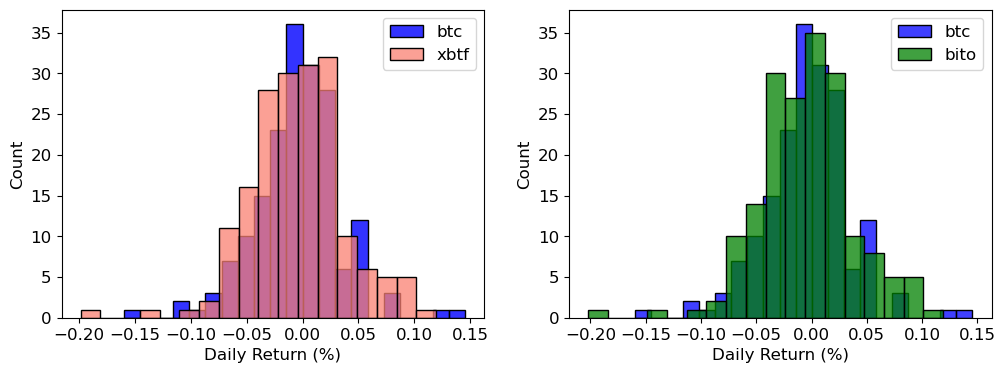

In [68]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))

# btc v xbtf
ax1=sns.histplot(x=rets[:,btc], kde=False, color='blue', alpha=0.8, label='btc', ax=ax1)
ax1=sns.histplot(x=rets[:,xbtf], kde=False, color='salmon', label='xbtf', ax=ax1)
ax1.set_xlabel("Daily Return (%)")
ax1.legend()
# btc v bito
ax2=sns.histplot(x=rets[:,btc], kde=False, color='blue', label='btc', ax=ax2)
ax2=sns.histplot(x=rets[:,bito], kde=False, color='green', label='bito', ax=ax2)
ax2.set_xlabel("Daily Return (%)")
ax2.legend()
plt.show()

**The returns of XBTF and BITO are more left-skewed compared to Bitcoin, with returns more concentrated to the left of the zero value.**

### Time Series Plot

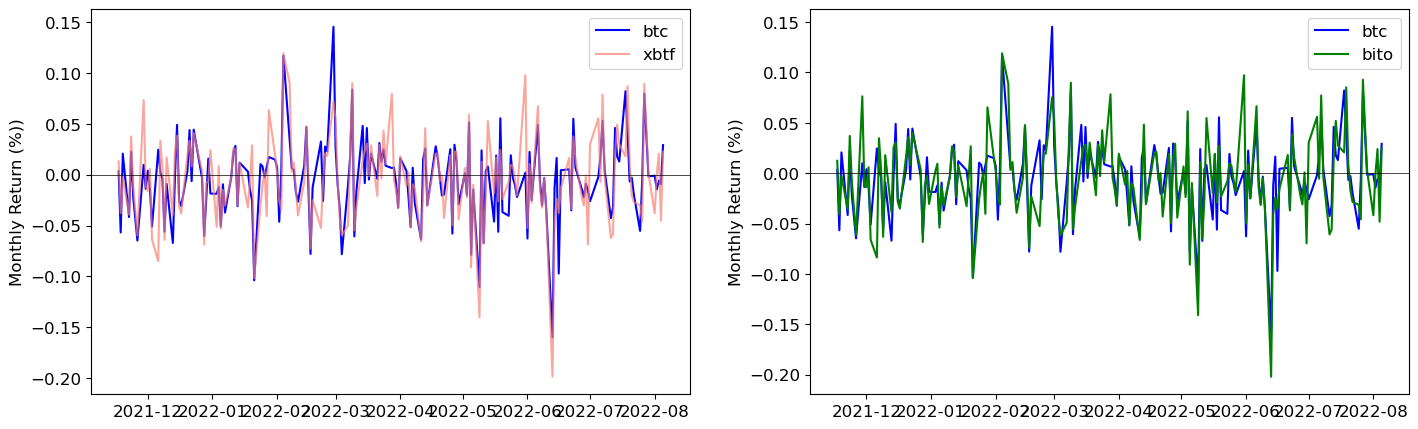

In [69]:
from matplotlib.ticker import FixedLocator
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,5))

# btc vs xbtf
sns.lineplot(x=dates, y=rets[:,btc], label="btc", color='b', ax=ax1)
sns.lineplot(x=dates, y=rets[:,xbtf], label="xbtf", color='salmon', alpha=0.7, ax=ax1)
ax1.axhline(0,0,1,color='k',linewidth=.5)
ax1.set_ylabel("Monthly Return (%))")


# btc vs. bito
sns.lineplot(x=dates, y=rets[:,btc], label="btc", color='b', ax=ax2)
sns.lineplot(x=dates, y=rets[:,bito], label="bito", color='green', ax=ax2)
ax2.axhline(0,0,1,color='k',linewidth=.5)
ax2.set_ylabel("Monthly Return (%))")
plt.show()


### Scatter Plot

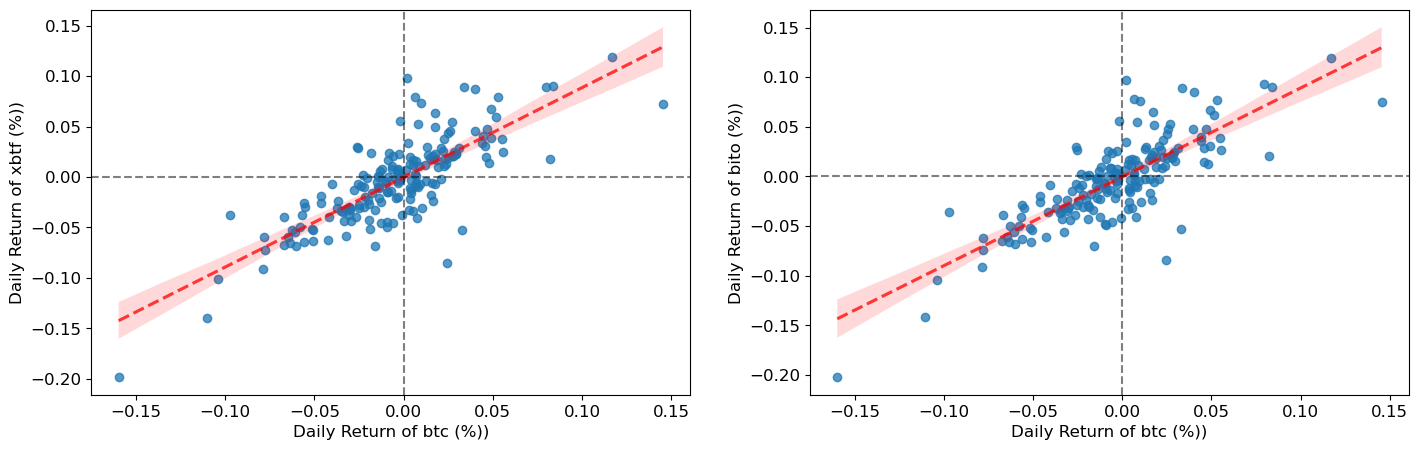

In [70]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,5))
sns.regplot(x=rets[:,btc],y=rets[:,xbtf],ax=ax1,
            scatter_kws={'alpha':.75},
            line_kws={'color':'r','linestyle':'--','alpha':0.75})

ax1.axvline(0,0,1,color='k',linestyle='--',alpha=0.5)
ax1.axhline(0,0,1,color='k',linestyle='--',alpha=0.5)
ax1.set_ylabel("Daily Return of xbtf (%))")
ax1.set_xlabel("Daily Return of btc (%))")

sns.regplot(x=rets[:,btc],y=rets[:,bito],ax=ax2,
            scatter_kws={'alpha':.75},
            line_kws={'color':'r','linestyle':'--','alpha':0.75})

ax2.axvline(0,0,1,color='k',linestyle='--',alpha=0.5)
ax2.axhline(0,0,1,color='k',linestyle='--',alpha=0.5)
ax2.set_ylabel("Daily Return of bito (%))")
ax2.set_xlabel("Daily Return of btc (%))")

plt.show()

The scatter plot reveals a close relationship between the returns of BTC, XBTF, and BITO. When the return of the btc increase the return on the xbtf and bito also increase

### Regression Analysis

In [71]:
y  = rets[1:,bito]
const = np.ones(y.shape[0])
x1 = rets[1:,btc]
xmat = np.stack((const,x1),axis=1)
res = sm.OLS(y,xmat).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           6.41e-41
Time:                        23:19:50   Log-Likelihood:                 399.29
No. Observations:                 179   AIC:                            -794.6
Df Residuals:                     177   BIC:                            -788.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.219      0.8

In [72]:
y  = rets[1:,xbtf]
const = np.ones(y.shape[0])
x1 = rets[1:,btc]
xmat = np.stack((const,x1),axis=1)
res = sm.OLS(y,xmat).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     304.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.80e-40
Time:                        23:19:50   Log-Likelihood:                 398.07
No. Observations:                 179   AIC:                            -792.1
Df Residuals:                     177   BIC:                            -785.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.214      0.8

**We can see that the R-square of this two regression achieves larger than 0.6, indicating that the variance of the return of xbtf and bito can be well explained by variance of the btc**

### Check for normality

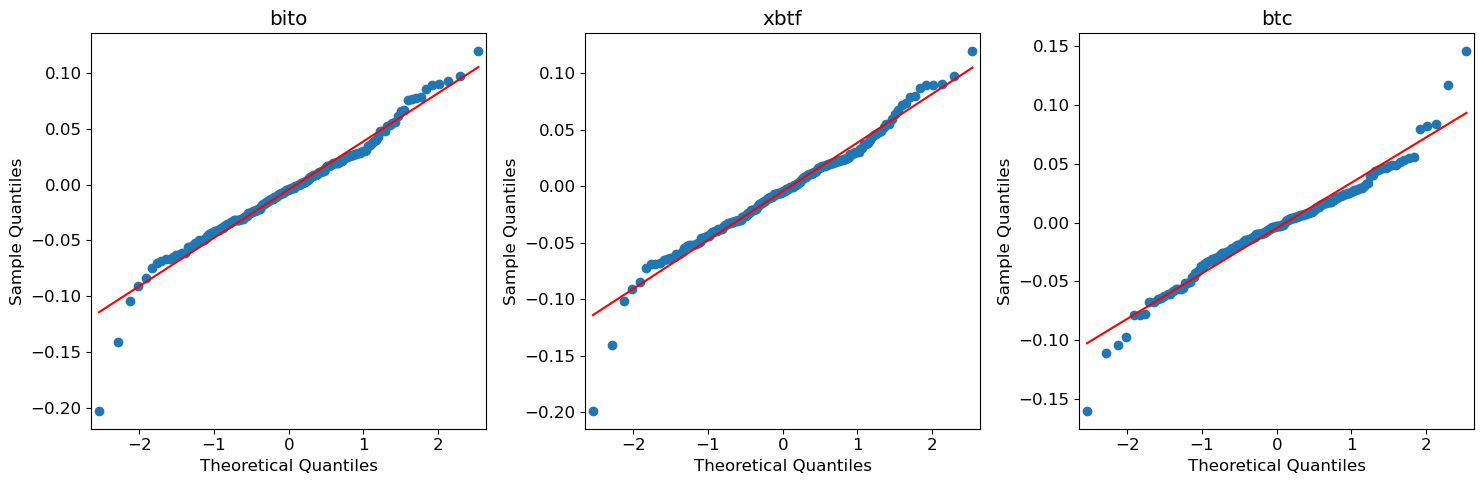

In [73]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = np.ravel(ax)
for i in np.arange(rets.shape[1]):
    m = ~np.isnan(rets[:,i]) # use non-Nan value, in this case no missing value
    x = rets[m,i]
    qqplot(x, ss.norm, line='s', ax=ax[i])
    ax[i].set_title(f"{rets_labs[i]}")
    
plt.tight_layout()
plt.show()

In [74]:
print("Tests of Normality:")
for i in np.arange(rets.shape[1]):
    m = ~np.isnan(rets[:,i])
    x = ss.normaltest(rets[m,i])
    print(f"  P-value: {x.pvalue:.4f} ({rets_labs[i]})")

Tests of Normality:
  P-value: 0.0002 (bito)
  P-value: 0.0004 (xbtf)
  P-value: 0.0006 (btc)


btc、xbtf and bito do not fit for the normal distribution

### Skewness and Kurtosis

In [75]:
for i in range(rets.shape[1]):
    
    # use scipy.stats
    skewness_scipy, kurtosis_scipy = ss.skew(rets[:,i]), ss.kurtosis(rets[:,i], fisher=True)

    print(f"skewness of {rets_labs[i]}: {skewness_scipy}, kurtosis of {rets_labs[i]}: {kurtosis_scipy}")

skewness of bito: -0.3362592248919343, kurtosis of bito: 2.2987900953970186
skewness of xbtf: -0.3174217292436635, kurtosis of xbtf: 2.109152782598917
skewness of btc: -0.10122298095868383, kurtosis of btc: 2.4419609610092365


### ACF Plot

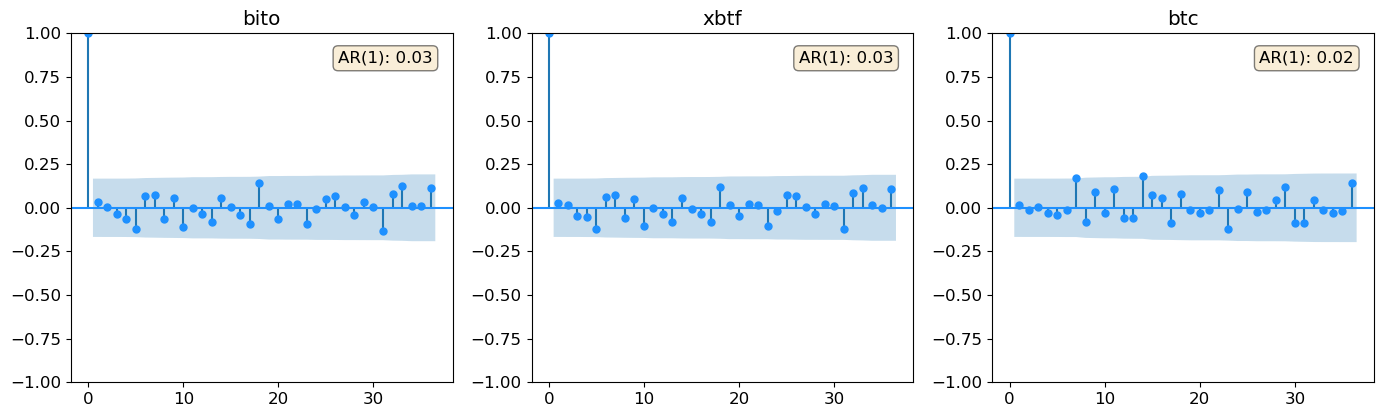

In [76]:
fig = plt.figure(figsize=(14,8))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Figure counter: 230 --> 2x3 grid
#subplot(2,3,1)=subplot(231) means 2x3 grid of plots, 1st subplot of the 6
# See here: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111
iplot = 230
for i in np.arange(3):
    iplot += 1                   # increment to tell maplotlib where to place the subplot
    ax = fig.add_subplot(iplot)  # add a suplot in position `iplot`
    sm.graphics.tsa.plot_acf(rets[:,i], lags=36, alpha=0.025, 
                         ax=ax, title=rets_labs[i], color='dodgerblue') #ACF function
   
    ar1 = np.corrcoef((rets[1:,i], rets[:-1,i]))[0,1] #autocorrelation of the series
    textstr = f"AR(1): {ar1:.2f}"
    ax.text(0.70, 0.95, textstr, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=props)
    
plt.tight_layout()
plt.show()

The autocorrelations of BITO, XBTF, and BTC are each very low

### Correlations

[[1.     0.795  0.7988]
 [0.795  1.     0.9901]
 [0.7988 0.9901 1.    ]]


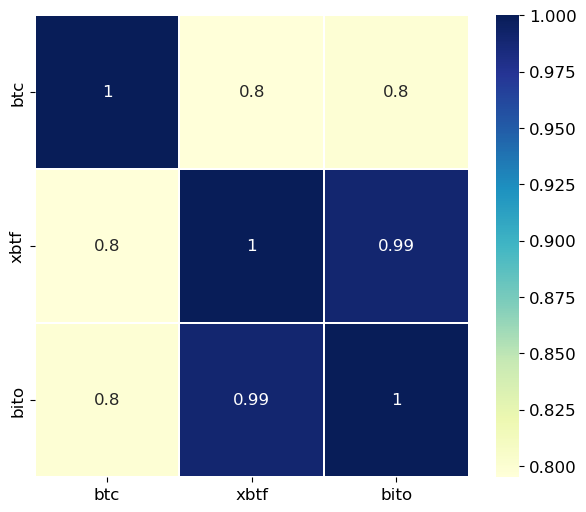

In [77]:
# get the correlation matrix for our return series
corrmat = np.corrcoef(rets[:,[btc,xbtf,bito]],rowvar=False)
print(corrmat)
# Create a heatmap to visualize the correlation matrix (easeier to read)
f, ax = plt.subplots(figsize =(7, 6)) 
sns.heatmap(corrmat, annot=True, 
            ax = ax, cmap ="YlGnBu", 
            xticklabels=rets_labs[::-1],
            yticklabels=rets_labs[::-1],
            linewidths = 0.1)
plt.show()

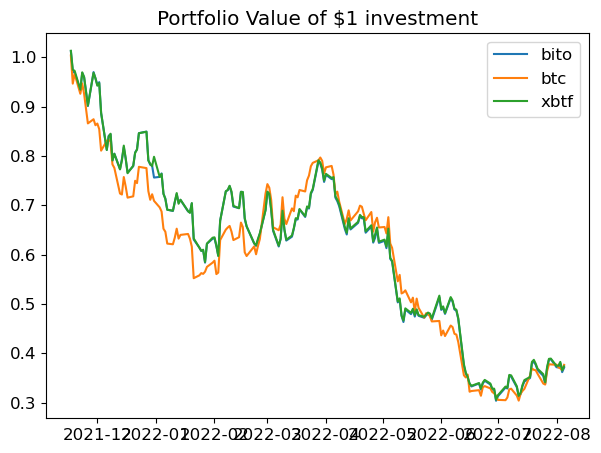

In [78]:
# Compute cumulative net return 
d = (1+rets[:,[bito,btc,xbtf]]).cumprod(axis=0) 

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(dates,d[:,0],label='bito')
ax.plot(dates,d[:,1],label='btc')
ax.plot(dates,d[:,2],label='xbtf')
ax.set_title("Portfolio Value of $1 investment")
ax.legend()
ax.grid(False)
plt.show()

The lines track closely together, suggesting that the ETFs' performance is closely correlated with the price of Bitcoin, which is to be expected if they are designed to track Bitcoin’s performance, other than some deviations due to fees, the specific structure of the ETFs, or other market factors. The time spans from December 2021 to August 2022, and the change in the value of the investment, with all three starting at 1 dollar and declining to less than 0.4 dollar by the end of the period. This indicates a significant loss in value, more than 60% for each investment if you hold these from December 2021 to August 2022.

###  Probability of Loss

In [79]:
# mask losses
loss = (rets[:,[bito,btc,xbtf]] < 0)
ploss = loss.mean(axis=0)
print(f"Pr(bitcoin Loss): {ploss[0]:.2%}, Pr(btc Loss): {ploss[1]:.2%},Pr(xbtf Loss): {ploss[2]:.2%}")

Pr(bitcoin Loss): 55.00%, Pr(btc Loss): 54.44%,Pr(xbtf Loss): 55.56%


### Expected return conditional on loss

In [80]:
for v in [bito,btc,xbtf]:
    loss = rets[:,v] < 0
    eloss_loss = rets[loss,v].mean()
    print(f"E({rets_labs[v]}|loss): {eloss_loss:.2%}")

E(bito|loss): -3.37%
E(btc|loss): -3.01%
E(xbtf|loss): -3.36%


### VaR

In [81]:
np.quantile(rets[:,[bito,btc,xbtf]],0.05,axis=0)
#np.quantile(rets[:,[fsret,rm]],0.05,axis=0).shape

array([-0.0661, -0.0648, -0.0657])

##  Answer For the Differences Between Direct Investment in Bitcoin and Investment in the ETFs

Til 2024 Janurary, the ETF of bitcoin is the Future Bitcoin ETF. Future Bitcoin ETF typically refers to a Bitcoin exchange-traded fund (ETF) that primarily invests in Bitcoin futures contracts rather than holding the physical Bitcoin directly. And the differences between the direct investment in bitcoin and bitcoin etf is following:  
1.**Ownership**:  
  Direct Bitcoin Investment: You actually own the cryptocurrency. You have a wallet with Bitcoin, and you hold the private keys.  
  Bitcoin ETFs: You own shares in an ETF that is made of financial derivatives to track the price of Bitcoin. The ETF owns the underlying Bitcoin or Bitcoin futures contracts.  
2.**Regulation**:  
  Direct Bitcoin Investment: Cryptocurrency markets are less regulated than traditional financial markets.  
  Bitcoin ETFs: Are regulated financial products, offering investors some level of protection and oversight.  
3.**Accessibility**:  
  Direct Investment: Requires technical knowledge for managing cryptocurrency transactions and storage. 
  ETF Investment: Accessible through traditional investment channels like brokerage accounts, requiring no specialized crypto-market knowledge.   
4.**Risk and Volatility**:  
  We can see that the standard deviation of the bitcoin ETF are higher than the bitcoin about 0.46% on daily returns, besides the VaR, loss probability, expected return given on the loss are all higher than the bitcoin. Therefore,Bitcoin ETFs may have higher volatility than Bitcoin itself due to factors such as the use of futures contracts and liquidity. Futures contracts can cause higher volatility in Bitcoin ETFs because they often involve leverage, which amplifies price movements, and the need to periodically roll contracts can introduce additional costs and uncertainties. Additionally lower liquidity in the ETF market can lead to larger price swings in response to trading activity.


# Question 5 

Unobserved risks of cryptocurrency include the following: 

**Policies**: Government regulations and the positions of regional organizations pose risks for cryptocurrency investments. The legitimacy of cryptocurrencies recognized by governments and organizations can lead to price fluctuations. Tax policies also impact investors' returns. 

**Popularity**: The popularity and acceptance of cryptocurrencies are critical factors influencing their prices. As the industry evolves and financial institutions and individuals increasingly adopt cryptocurrencies as payment methods or investment vehicles, market acceptance is likely to rise, thereby driving prices higher.

**International Situations and Conflicts**: Regional conflicts can spill over into financial markets and thus affect cryptocurrency price movements.

**Macroeconomic Factors**: The growth and contraction of the global economy may impact the cryptocurrency market, including events like COVID-19, economic crises, and other unforeseen occurrences.

**Computer Science Technology**: 
1. Cryptocurrencies require robust technical support. The analysis above does not cover aspects like blockchain technology and security vulnerabilities. Any hacker attacks or technical failures could deal a fatal blow to cryptocurrency market stability. 
2. As mentioned in the comments section of the write up, cryptocurrencies have the potential to be maliciously attacked by hackers, causing significant losses in previous hacking cases. So the potential security risks should not be completely ignored. If there is a breakthrough in the hacker attack technology or means of blockchain, which leads to a sharp decline in the security of cryptocurrency, the value of cryptocurrency assets will also be significantly reduced.

# Question 6

### Question: Based on your analysis, what should Bill recommend to his clientele? Be sure to support any recommendations with evidence from your analysis.

Based on the analysis provided, Bill should recommend the following to his clientele:  
1. **High-Risk Asset**: Bitcoin is a high-risk asset with significant volatility and historical returns that far exceed those of stocks. It is not suitable for most investors due to its risk profile. However, for clients willing to take on high risk, Bitcoin can offer substantial rewards.  
2. **Diversification Tool**: Bitcoin has weak correlation with traditional stock and bond markets, making it a valuable tool for portfolio diversification. Including a small allocation of Bitcoin in a diversified portfolio can potentially reduce overall risk and improve returns.  
3. **Optimal Sharpe Ratio**: Historical data suggests that adding Bitcoin to an investment portfolio can increase the portfolio's Sharpe ratio, indicating higher risk-adjusted returns. Bill should advise clients interested in optimizing their portfolios to consider a measured allocation to Bitcoin. 
4. **Bitcoin ETF as an Alternative**: For clients interested in Bitcoin's risk-return profile but hesitant to deal with the complexities of buying and storing cryptocurrency, a Bitcoin ETF can be an attractive alternative. It offers exposure to Bitcoin's performance in a regulated, more accessible format without the need to directly interact with the cryptocurrency market. We can see that the correlation coefficient between Bitcoin and Bitcoin ETF has reached   0.8. Additionally by analyzing the linear relationship of bitcoin etf and bitcoin, we find that the R-square achieves about 0.63, which shows a great linear relationship between these two. Moreover, through scatter plots, time series graphs, and investment performance charts, we can observe that their return curves are closely linked. 

Bill should emphasize that while Bitcoin and Bitcoin ETFs can be part of a well-rounded investment strategy for certain investors, they should only constitute a small portion of the portfolio due to their high volatility. He should also advise clients to carefully assess their risk tolerance and investment objectives before considering an allocation to Bitcoin or Bitcoin ETFs.